In [1]:
import numpy as np
from PIL import Image
import math
import random
import sys, getopt
from scipy.fft import fft2, fftfreq, fftshift
from scipy import fftpack
from matplotlib import pyplot as plt
import cmath

In [2]:
def M(x, y):
    if(x**2 + y**2 < (math.pi/2)**2):
        return 1
    else:
        return 0

In [3]:
def p_s(x, y):
    return 0.375*50 * math.pi * (x**2 + y**2)

In [4]:
def p(x, y):
    return 0.5 * math.pi * (x**2 + y**2)

In [8]:
def createFilter(sigma):  # создает матрицу для фильтра нужной нам размерности (h)
# от сигма зависит степень размытия. чем больше сигма тем больше размытие
    
    matr = np.zeros(shape = (512,512), dtype = np.complex128) # матрица из 0 (по размеру изборжания подаваемого)
                                          
    #|F(M(x,y)∙exp{i∙p_s (x,y,∆z_nm )+i∙p(x,y)})|
    
    #p_s = 0.375* math.pi * (разность между слоями) * (x**2 + y**2) 
     
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            x = math.pi/511*(i-255)
            y = math.pi/511*(j-255)
            matr[i, j] = M(x,y) * cmath.exp(1j * p_s(x,y) + p(x,y))
            #print(i, ' ', j,' ', matr[i,j], '\n')
    #s = np.sum(matr)
    #matr /= s
    return abs(fftshift(fft2(matr)))

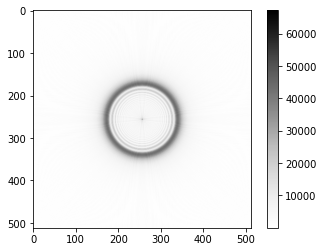

In [9]:
#загрузка и применение функций преобразования к исходному изображению
im = Image.open('src.png', 'r')
#im.show()
data = np.array(im)         # массив чисел из которых сост изображение

#data_f = data.astype(np.float) # рассматриваем как float

plt.imshow(createFilter(1), cmap="Greys")
plt.colorbar()
#final = GaususFilter(data_f, 1)
#final = final.astype(np.uint8)
#omg = Image.fromarray(final)
#omg = omg.save('/Users/u0da/Download/')
#omg.show()

In [7]:
def GaususFilter(a, sigma):  # сам способ фильтрации, то что мы применяем к созданной нами матрице
    rad = 3 * int(sigma)
    b = np.zeros(shape=(a.shape[0] + 2 * rad, a.shape[1] + 2 * rad, a.shape[2]))
    b[rad: -rad, rad: -rad, :] = a
    c = np.zeros(shape=(a.shape[0] + 2 * rad, a.shape[1] + 2 * rad, a.shape[2]))

    filter = createFilter(sigma)
    filter_3D = np.stack((filter,) * 3, axis =- 1)
    for i in range(rad, a.shape[0] + rad):
        for j in range(rad, a.shape[1] + rad):
            matr = b[i - rad: i + rad + 1, j - rad: j + rad + 1, :]
            matr = matr * filter_3D
            c[i, j, 0] = np.sum(matr[:, :, 0])
            c[i, j, 1] = np.sum(matr[:, :, 1])
            c[i, j, 2] = np.sum(matr[:, :, 2])
    c = np.clip(c, 0, 255).astype(np.uint8)
    a = c[rad: -rad, rad: -rad, :]
    return a